1) How will you address null values and what is your strategy for addressing the outliers in the data?
2) Is the target variable class balanced or imbalanced?
3) Explain the relationship between each risk factor and the likelihood of diabetes, using appropriate graphs

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")

How will you address null values and what is your strategy for addressing the outliers in the data?

In [4]:
diabetes_data = pd.read_csv(r'C:\Users\USER\Downloads\diabetes.csv') 

print (diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.shape

(768, 9)

In [10]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_data.duplicated().sum()

0

In [10]:
def detect_outliers(diabetes_data):
    outliers= pd.DataFrame(columns=["Feature","NO Outliers","Handled?"])
    for col in list(set(diabetes_data.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = diabetes_data[col].quantile(0.25)
        q3 = diabetes_data[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = diabetes_data.loc[(diabetes_data[col] < fence_low) | (diabetes_data[col] > fence_high)].shape[0]
                   
        diabetes_data.loc[(diabetes_data[col] < fence_low),col] = fence_low
        diabetes_data.loc[(diabetes_data[col] > fence_high),col] = fence_high
        #let's fix them
        #diabetes_data[col] = np.where((df[col] > fence_high) | (diabetes_data[col] > fence_high),diabetes_data[col].median(),diabetes_data[col])
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": diabetes_data[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(diabetes_data)

,Feature,NO Outliers,Handled?
0,Pregnancies,4,True
1,Insulin,34,True
2,Age,9,True
3,BloodPressure,45,True
4,DiabetesPedigreeFunction,29,True
5,Glucose,5,True
6,BMI,19,True
7,SkinThickness,1,True


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

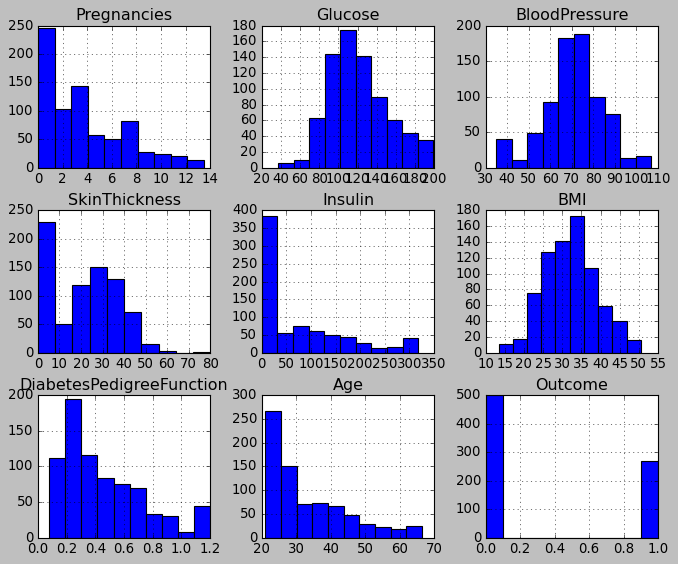

In [40]:
diabetes_data.hist(figsize=(10,8))

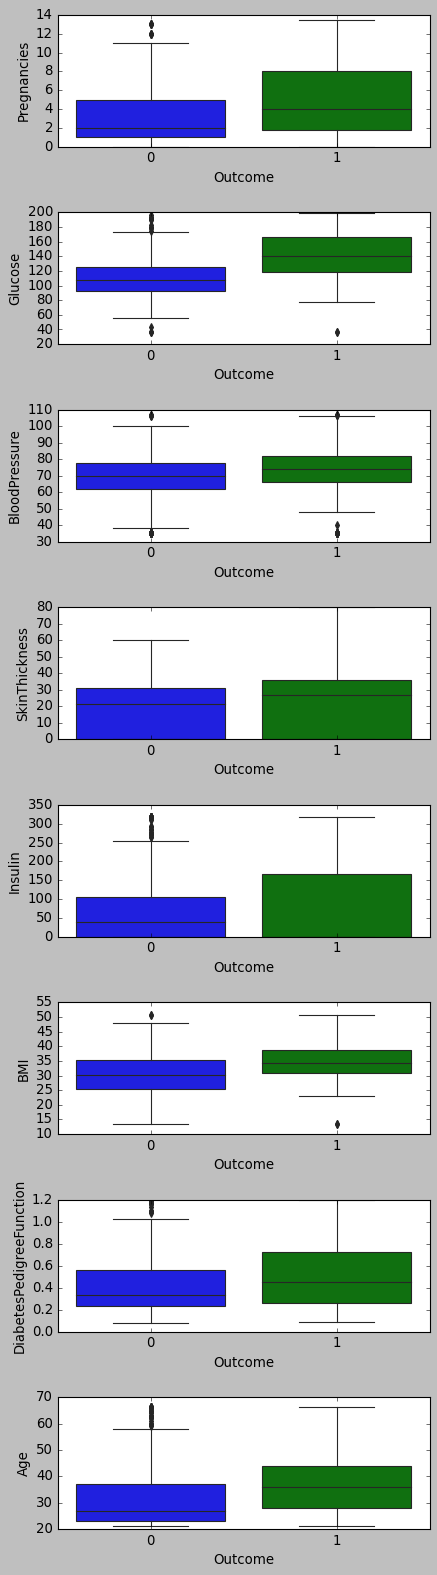

In [42]:
plt.figure(figsize=(6,36))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in diabetes_data.columns.drop('Outcome'):
    plt.subplot(12,1,i)
    sns.boxplot(data=diabetes_data, x='Outcome', y=col_name)
    i +=1

In [44]:
# creating variable for outliers calculation

outliers_var = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
iqr= outliers_var.quantile(0.75)- outliers_var.quantile(0.25)
low = outliers_var.quantile(0.25)-1.5*iqr
high = outliers_var.quantile(0.75)+1.5*iqr

In [45]:
outliers_var

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [46]:
outliers_var[(outliers_var < low) & (outliers_var > high)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2) Is the target variable class balanced or imbalanced?

In [78]:
X=diabetes_data.drop('Outcome',axis=1)
y=diabetes_data['Outcome']

The ratio between counts is diff not the same which means our dataset is imbalanced.

In [79]:
x = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [81]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (614, 8)
Number transactions y_train dataset:  (614,)
Number transactions x_test dataset:  (154, 8)
Number transactions y_test dataset:  (154,)


3) Explain the relationship between each risk factor and the likelihood of diabetes, using appropriate graphs

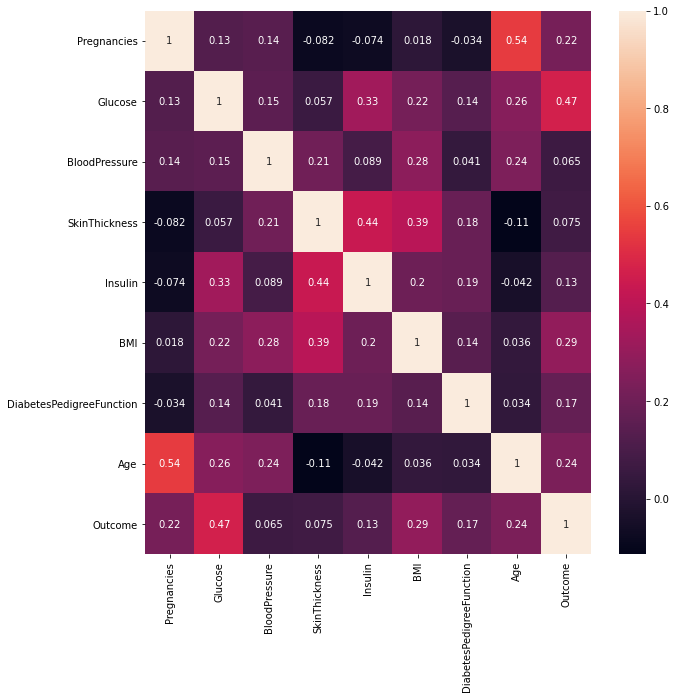

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_data.corr(), annot= True,)
plt.show()

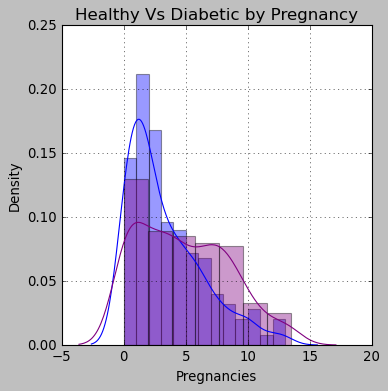

In [37]:

plt.figure(figsize=(5,5))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["Pregnancies"], color='blue') # Healthy - blue
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["Pregnancies"], color='purple') # Diabetic - purple

plt.title('Healthy Vs Diabetic by Pregnancy', fontsize=15)
plt.xlim([-5,20])
plt.grid(linewidth = 0.5)
plt.show()

There is low chance of pregnancy causing Diabetes

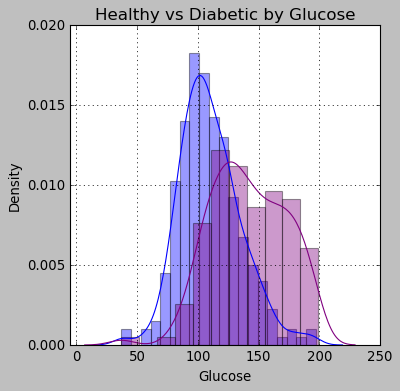

In [23]:

plt.figure(figsize=(5,5))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["Glucose"], color='blue') # Healthy - blue
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["Glucose"], color='purple') # Diabetic - purple

plt.title('Healthy vs Diabetic by Glucose', fontsize=15)
plt.xlim([-5,250])
plt.grid(linewidth = 0.7)
plt.show()

Gradual increase in sugar levels may cause Diabetes

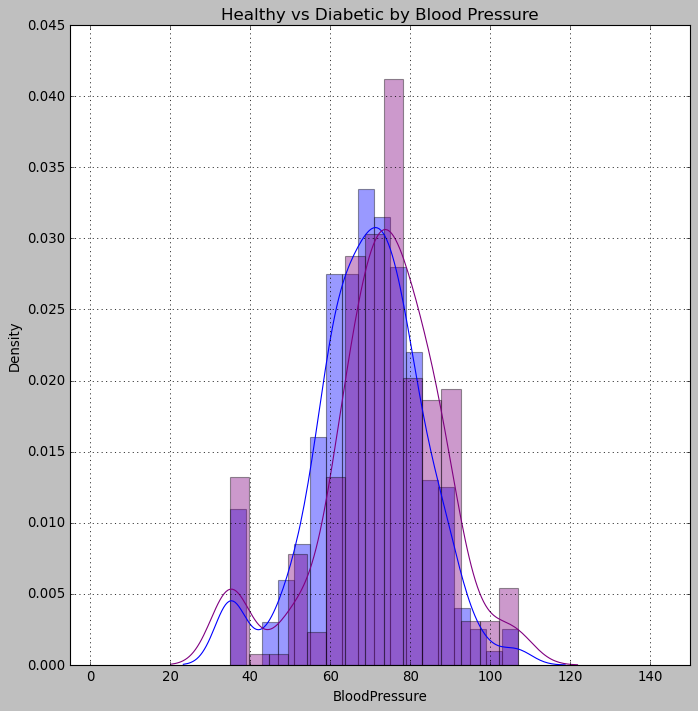

In [27]:
plt.figure(figsize=(10,10))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["BloodPressure"], color='blue') # Healthy - blue
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["BloodPressure"], color='purple') # Diabetic - purple

plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=15)
plt.xlim([-5,150])
plt.grid(linewidth = 0.7)
plt.show()

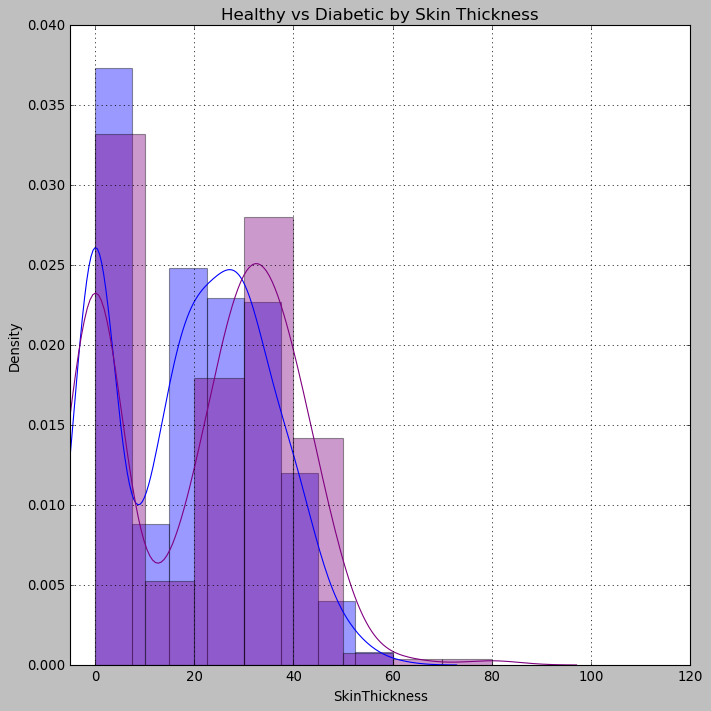

In [33]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["SkinThickness"], color='blue') # Healthy - blue
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["SkinThickness"], color='purple') # Diabetic - purple

plt.title('Healthy vs Diabetic by Skin Thickness', fontsize=15)
plt.xlim([-5,120])
plt.grid(linewidth = 0.7)
plt.show()

Skin thickness is not likely to xcause Diabetes

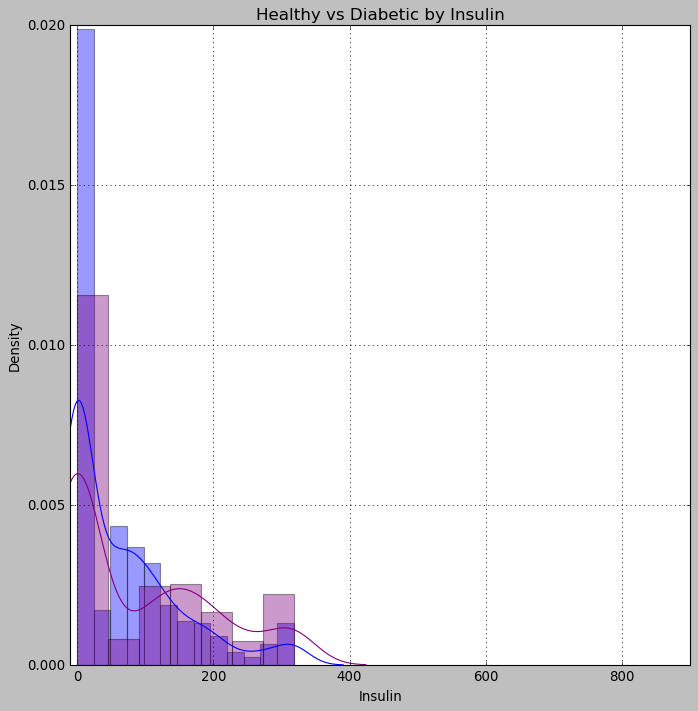

In [31]:
plt.figure(figsize=(10,10))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["Insulin"], color='blue') # Healthy - blue
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["Insulin"], color='purple') # Diabetic - purple

plt.title('Healthy vs Diabetic by Insulin', fontsize=15)
plt.xlim([-10,900])
plt.grid(linewidth = 0.7)
plt.show()

Increase in insuline cause diabetes

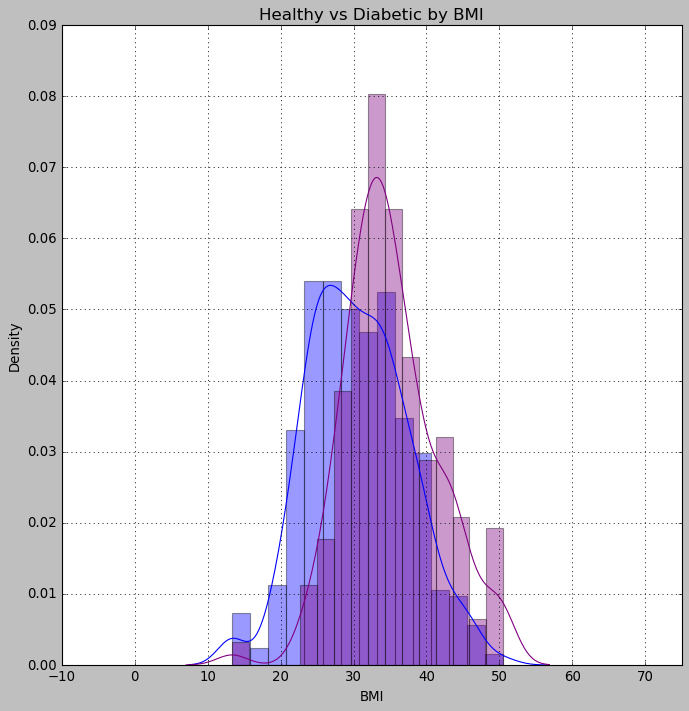

In [38]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["BMI"], color='blue') # Healthy - blue
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["BMI"], color='purple') # Diabetic - purple

plt.title('Healthy vs Diabetic by BMI', fontsize=15)
plt.xlim([-10,75])
plt.grid(linewidth = 0.7)
plt.show()

As BMI increases Diabetes likelihood decreases.

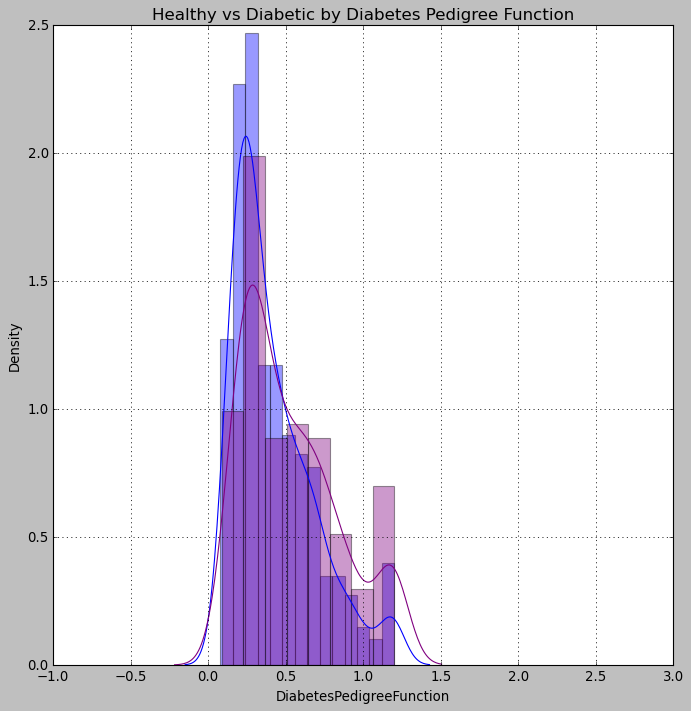

In [29]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["DiabetesPedigreeFunction"], color='blue') 
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["DiabetesPedigreeFunction"], color='purple') 

plt.title('Healthy vs Diabetic by Diabetes Pedigree Function', fontsize=15)
plt.xlim([-1,3])
plt.grid(linewidth = 0.7)
plt.show()

As DPfunction increases Diabetes likelihood also increase.

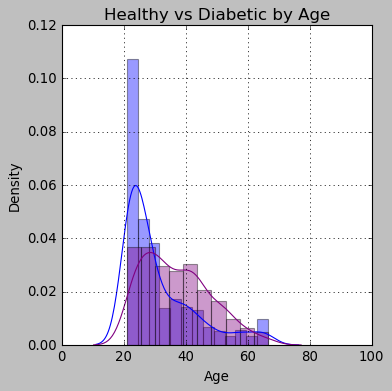

In [36]:

plt.figure(figsize=(5,5))

sns.distplot(diabetes_data[diabetes_data['Outcome'] == 0]["Age"], color='blue') 
sns.distplot(diabetes_data[diabetes_data['Outcome'] == 1]["Age"], color='purple') 
plt.title('Healthy vs Diabetic by Age', fontsize=15)
plt.xlim([0,100])
plt.grid(linewidth = 0.7)
plt.show()

As Age increases so does the chances of being diabetic